<a href="https://colab.research.google.com/github/mrgs22/csi4180hw04/blob/main/CSI4180HW04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#CSI-4180
#homework 04
#gregory sylvester
#4/23/2024

In [89]:
!pip install nltk

In [30]:
!pip install convokit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.2/183.2 kB 4.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 676.9/676.9 kB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7/307.7 kB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 15.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 7.8 MB/s eta 0:00:00
  Created wheel for convokit: filename=convokit-3.0.0-py3-none-any.whl size=216707 sha256=43afd19dcf2cc9e93fd5e1c5dd34222cb1136624fbef31d4dd63b3caeba1db0e
  Stored in directory: /root/.cache/pip/wheels/c4/89/8c/2677fdb888588b6f93cb6ac86bdfb020f1f1c

In [110]:
from convokit import Corpus, download
corpus = Corpus(filename=download("reddit-corpus-small"))

Dataset already exists at /root/.convokit/downloads/reddit-corpus-small


In [289]:
!pip install -U gradio

  Using cached gradio-4.27.0-py3-none-any.whl (17.1 MB)
  Using cached gradio_client-0.15.1-py3-none-any.whl (313 kB)
  Attempting uninstall: gradio-client
    Found existing installation: gradio_client 0.5.0
    Uninstalling gradio_client-0.5.0:
      Successfully uninstalled gradio_client-0.5.0
  Attempting uninstall: gradio
    Found existing installation: gradio 3.43.1
    Uninstalling gradio-3.43.1:
      Successfully uninstalled gradio-3.43.1


In [326]:
import pandas as pd
import numpy as np
import nltk
import gradio as gr
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [292]:
titles = corpus.get_conversations_dataframe()['meta.title'].values
subreddits = corpus.get_conversations_dataframe()['meta.subreddit'].values
dataset = np.column_stack((titles, subreddits))
print(dataset)
stemmer = nltk.stem.PorterStemmer()
stopwords = nltk.corpus.stopwords.words("english")

[['/r/singapore random discussion and small questions thread for September 02, 2018'
  'singapore']
 ['What are your biggest complaints about singapore?' 'singapore']
 ['Worst taxi driver you’ve ever encountered?' 'singapore']
 ...
 ['That’s gonna be a no from me, dawg' 'Libertarian']
 ['Looking at you Bernie Bros.' 'Libertarian']
 ['Curious what the folks here think about this' 'Libertarian']]


In [324]:
categories = corpus.get_conversations_dataframe()['meta.subreddit'].unique()
print(categories.size)

100


In [294]:
def preprocess(text):
  text = text.lower()
  tokens = word_tokenize(text)
  tokens = [word for word in tokens if word not in stopwords]
  tokens = [stemmer.stem(word) for word in tokens]
  tokens = [token for token in tokens if token.isalpha()]
  return tokens

In [295]:
for i, text in enumerate(dataset[:, 0]):
    dataset[i, 0] = preprocess(text)

In [296]:
words_list = dataset[:, 0]
labels = dataset[:, 1]
word_strings = [' '.join(words) for words in words_list]
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(word_strings)
tfidf_array = tfidf_matrix.toarray()
print(tfidf_array[1][:-1])

[0. 0. 0. ... 0. 0. 0.]


In [297]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_array, labels, test_size=0.05, random_state=22)

In [298]:
model_MLP = MLPClassifier(hidden_layer_sizes=100, activation='relu', solver='adam', random_state=22)
model_MLP.fit(X_train, y_train)
y_pred_mlp = model_MLP.predict(X_test)
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print("mlp classifier", accuracy_mlp)

mlp classifier 0.17349397590361446


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


In [299]:
model_naiveBayes = MultinomialNB()
model_naiveBayes.fit(X_train, y_train)
y_pred_nb = model_naiveBayes.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Naive Bayes Accuracy:", accuracy_nb)

Naive Bayes Accuracy: 0.36626506024096384


In [300]:
model_knn = KNeighborsClassifier(n_neighbors=100)
model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("K-Nearest Neighbors Accuracy:", accuracy_knn)

K-Nearest Neighbors Accuracy: 0.2963855421686747


In [322]:
def predict_subreddit(input_text,text_model):
  if text_model == "KNN":
    model = model_knn
  elif text_model == "Naive Bayes":
    model = model_naiveBayes
  elif text_model == "MLP":
    model = model_MLP
  else:
    return "No model was selected"
  processed_text = ' '.join(preprocess(input_text))
  print(processed_text)
  input_tfidf = tfidf_vectorizer.transform([processed_text])
  predicted_subreddit = model.predict(input_tfidf)
  print("Predicted subreddit:", predicted_subreddit)
  return "r/" + predicted_subreddit[0]

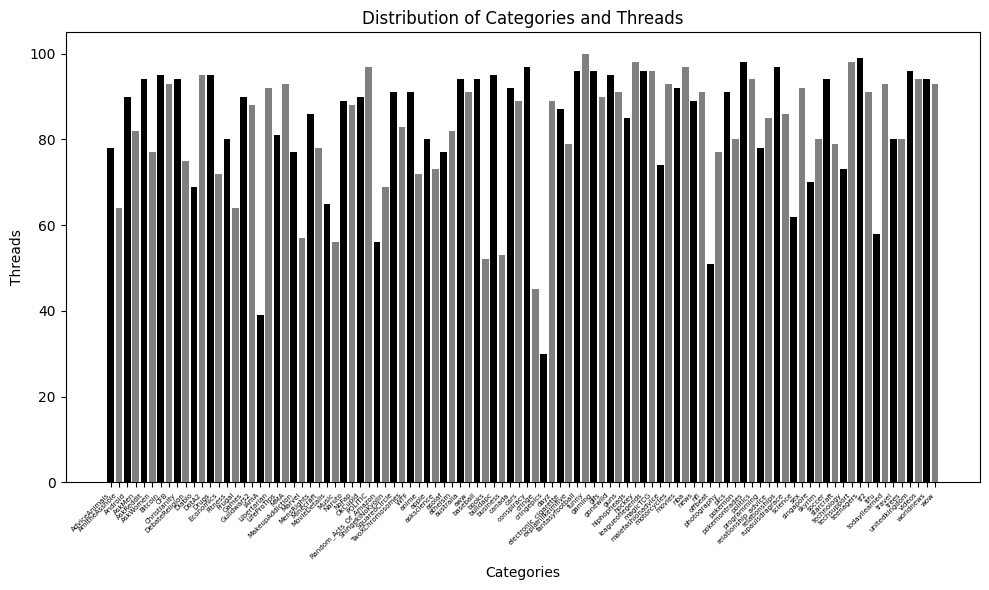

In [331]:
categories, counts = np.unique(dataset[:, 1], return_counts=True)
plt.figure(figsize=(10, 6))
plt.bar(categories, counts, color=['black','grey'])
plt.xlabel('Categories')
plt.ylabel('Threads')
plt.title('Distribution of Categories and Threads')
plt.xticks(rotation=45, ha='right',fontsize =5)
plt.tight_layout()

plt.show()

In [310]:
predict_subreddit("trump", "KNN")
predict_subreddit("trump","Naive Bayes")
predict_subreddit("trump","MLP")

trump
Predicted subreddit: ['politics']
trump
Predicted subreddit: ['politics']
trump
Predicted subreddit: ['POLITIC']


'POLITIC'

In [333]:
about_content = f'''Introduction

  This is a project that aims to build classifiers for text, this way you can find the correct subreddit for the topic your text uses. This way you will be able to communicate with others on the appropriate scope. We present 3 different models to select from to classify the text given.

  Usage

  To use the tool follow the simple steps below
  Navigate to the models Tab (should start on this tab)
  In the Enter Text field put the thread you want to post about, may want to keep this relatively simple
  Select one of the model types below
  You will then be presented with one of the subreddits
  *Note there is only 100 subreddit types classified

  Cat-[KNN]-r/aww
  I like to drive cars around-[Naive Bayes]-r/cars
  What is trump doing-[MLP]- r/politic

  Documentation

  Data Distribution <img src="dataDist.png" alt="DataDist">

  This project involved using several different tools, data collection was an issue with the large amount of subreddits that exist. So for the purposes of this project the set of results was reduced down to the 100 present in the dataset. This data set contains all the information necessary, labels and threads. To build the models I made extensive use of the SKL library. I also used NLTK to pull the most important stopwords from the corpus. Finally I used the Numpy, pandas, and gradio for the remainder of the tasks.

  <img src="flowchart.png" alt ="flowchart">

  The biggest part is the creation of training of the models. Starting with preprocessing the threads (which were treated as documents). To do this I simply lowercase everything, then tokenized it all, removed stopwords, stemmed it, checked if it exists in the alphabet. This removed all the unnecessary threads that I could find. Then I threw the result into a simple skl tf idf vectorizer.

  I made three relatively simple models: KNN, Multilayer Perceptron (MLP), and Naive Bayes(NB). All these models performed simple classification on the labels and vectors using the sklearn library. KNNs only configuration is 100 = n, I tried a few different numbers (1,5,10,100,1000) and 100 seem to be the best fitting. MLP has 100 layers (also played around with dimensions to see if significantly improved perfromance), this takes a long time to completely finish training so if you stop it in the middle it will sometimes just use those weights. Finally is the NB which requires no specific parameters. All of these used a simple 95/5 split on the dataset.

  Contribution

  Training models - Tuning basic parameters on the models (KNN and MLP) to improve performance
  Data preparation - prepreprocess and vectorize dataset

  Limitation

  Trained on 100 subreddit threads (limited output to these subreddits)
  issue if Thread is long
  issue if Threads contains multiple specific topics
  '''

In [ ]:
model_selection_interface = gr.Interface(
    fn=predict_subreddit,
    inputs=[gr.Textbox(label="Enter text", lines=1),gr.Radio(["KNN", "Naive Bayes", "MLP"], label="Select Model")],
    outputs=gr.Textbox(label="Predicted subreddit", type="text"),
    title="Subreddit Prediction",
    description="Choose a model and enter text to predict the subreddit thread."
)


about_interface = gr.Textbox(about_content, label="About",lines = 300)

demo = gr.TabbedInterface([model_selection_interface,about_interface], ["models","about_interface"])
demo.launch(debug=True)

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://1e36ae23ca5b1d7821.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
